In [1]:
!pip install tensorflow==2.9.0 ampligraph==2.0.1

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_

In [2]:
!pip install rdflib

In [7]:
import numpy as np
import pandas as pd
import ampligraph


In [1]:
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.namespace import Namespace, NamespaceManager
from rdflib.plugins import sparql
from rdflib.namespace import RDF, RDFS, XSD
from rdflib.serializer import Serializer

# Create a Graph
gt = Graph()
gt.parse("ontology (6).rdf")
#gt.serialize(destination="sm.rdf", format='application/rdf+xml')

<Graph identifier=N63be09a408fd4492b681f53da217b43e (<class 'rdflib.graph.Graph'>)>

In [84]:
from ampligraph.datasets import load_from_rdf
triples = load_from_rdf(folder_name="/Users/jalal/DataspellProjects/KG/", file_name="sm.rdf", rdf_format='application/rdf+xml')
triples

array([['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_16580',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#gender',
        '2'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Character_101886_1834',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#appearsIn',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_1834'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_1813',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#budget',
        '57000000'],
       ...,
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Character_3236657_1630',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#name',
        'Georgia Reporter'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_1486457',
        'http://www

In [86]:
triples

array([['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_16580',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#gender',
        '2'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Character_101886_1834',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#appearsIn',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_1834'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_1813',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#budget',
        '57000000'],
       ...,
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Character_3236657_1630',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#name',
        'Georgia Reporter'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_1486457',
        'http://www

In [ ]:
df = pd.DataFrame(triples, columns=['Subject', 'Predicate', 'Object'])

# Display the DataFrame
print(df.size)

In [93]:
filtered_df = df[~df.apply(lambda row: row.astype(str).str.contains('Character').any(), axis=1)]
filtered_df2 = filtered_df[~filtered_df.apply(lambda row: row.astype(str).str.contains('gender').any(), axis=1)]


In [98]:
filtered_df3 = filtered_df2[~filtered_df2.apply(lambda row: row.astype(str).str.contains('nationality').any(), axis=1)]

In [99]:
filtered_df4 = filtered_df3[~filtered_df3.apply(lambda row: row.astype(str).str.contains('birthDate').any(), axis=1)]

In [138]:
filtered_df4.size

507420

In [ ]:
search_string = 'placeOfBirth'  # Replace with the string you want to search for

# Use str.contains() to create a boolean mask
mask = filtered_df4.apply(lambda column: column.astype(str).str.contains(search_string, case=False, na=False))

# Filter the DataFrame using the mask
result = filtered_df4[mask.any(axis=1)]

# Display the filtered DataFrame
print(result.head())

In [ ]:
text_to_replace = 'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#'  # Replace spaces with underscores
replacement_string = ''

# Use the .replace() method to replace text in all columns
df_replaced = filtered_df4.apply(lambda col: col.str.replace(text_to_replace, replacement_string))

# Display the DataFrame with replaced text
print(df_replaced)

In [170]:
df_replaced

,Subject,Predicate,Object
2,Movie_1813,budget,57000000
6,Person_2053286,name,Abraham Abraham
14,Person_13741,name,Peter Pauli
16,Person_1676797,actedIn,Movie_1422
17,Person_1185375,actedIn,Movie_483
...,...,...,...
518952,Movie_244,hasActor,Person_1152705
518954,Person_11392,actedIn,Movie_746
518963,Person_205,actedIn,Movie_1443
518964,Movie_885,releaseDate,1928-09-16


In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen

X_train, X_valid = train_test_split_no_unseen(np.array(filtered_df4), test_size=0.2)

In [194]:
X_train

array([['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_7063',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#actedIn',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_1951'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_31210',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#actedIn',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_912'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_19639',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#directs',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_1871'],
       ...,
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_83816',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#name',
        'John H

In [172]:
import tensorflow as tf

In [186]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer

# Initialize a ComplEx neural embedding model
model = ScoringBasedEmbeddingModel(k=100,
                                   eta=20,
                                   scoring_type='ComplEx')


# Optimizer, loss and regularizer definition
optim = tf.keras.optimizers.Adam(learning_rate=1e-2)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

# Compilation of the model
model.compile(optimizer=optim,
              loss=loss,
              entity_relation_regularizer=regularizer)

WARNING - At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


In [187]:
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)

# Fit the model
model.fit(X_train,
          batch_size=int(X_train.shape[0] / 50),
          epochs=100,  # Number of training epochs
          verbose=True  # Enable stdout messages
          )

Epoch 1/100
52/52 [==============================] - 7s 126ms/step - loss: 7935.5264
Epoch 2/100
52/52 [==============================] - 6s 106ms/step - loss: 5622.5869
Epoch 3/100
52/52 [==============================] - 5s 103ms/step - loss: 3835.4697
Epoch 4/100
52/52 [==============================] - 5s 104ms/step - loss: 2886.1199
Epoch 5/100
52/52 [==============================] - 6s 108ms/step - loss: 2317.1592
Epoch 6/100
52/52 [==============================] - 6s 117ms/step - loss: 1938.8344
Epoch 7/100
52/52 [==============================] - 5s 104ms/step - loss: 1668.7712
Epoch 8/100
52/52 [==============================] - 6s 112ms/step - loss: 1466.9379
Epoch 9/100
52/52 [==============================] - 7s 128ms/step - loss: 1310.0320
Epoch 10/100
52/52 [==============================] - 7s 128ms/step - loss: 1184.8124
Epoch 11/100
52/52 [==============================] - 6s 113ms/step - loss: 1082.0446
Epoch 12/100
52/52 [==============================] - 10s 189ms

In [188]:
filter_triples = {'test': np.concatenate((X_train, X_valid))}

In [189]:
ranks = model.evaluate(X_valid,
                      #  model=model,
                        use_filter=filter_triples,
                      #  use_default_protocol=True,
                        verbose=True)

1059/1059 [==============================] - 391s 369ms/step


In [190]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.48
MR: 9183.53
Hits@10: 0.56
Hits@3: 0.50
Hits@1: 0.43


In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen 
from sklearn.model_selection import train_test_split

relations = df['Predicate'].unique()
print(relations)

In [ ]:
st_set, test_subset])

# Shuffle the datasets
train_set = train_set.sample(frac=1, random_state=42).reset_index(drop=True)
test_set = test_set.sample(frac=1, random_state=42).reset_index(drop=True)

triplets_array = df.to_numpy()
train, test = train_test_split_no_unseen(triplets_array, test_size=0.2)

In [62]:
from ampligraph.evaluation import train_test_split_no_unseen

X_train, X_valid = train_test_split_no_unseen(np.array(triples), test_size=100000)

In [72]:
filter_triples = {'test': np.concatenate((X_train, X_valid))}

In [127]:
X_valid

array([['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_1269602',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#actedIn',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_22'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_1961',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#hasActor',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_2759525'],
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_2757418',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#actedIn',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_664'],
       ...,
       ['http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Person_3130',
        'http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#actedIn',
       

In [198]:
filtered_df4.groupby(filtered_df4.Predicate).count()

,Subject,Object
Predicate,,
http://swrl.stanford.edu/ontologies/3.3/swrla.owl#isRuleEnabled,1,1
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#actedIn,52279,52279
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#budget,1354,1354
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#cinematographyFor,1428,1428
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#composedMusicFor,1318,1318
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#directedBy,1445,1445
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#directs,1445,1445
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#filmedBy,1428,1428
http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#genreOf,3326,3326


In [ ]:
!pip install seaborn

In [136]:
!pip install adjustText==0.8

In [137]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
%matplotlib inline

In [199]:
pattern = r'(http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#Movie_\d+)'

# Extract links matching the pattern from the DataFrame
matches = filtered_df4['Subject'].str.extract(pattern, expand=False)
import math
# Create a set of the matched links
link_set = set(matches)
filtered_set = {x for x in link_set if not (isinstance(x, float) and math.isnan(x))}

In [ ]:
filtered_set

In [209]:
embeddings_array = np.array(list(filtered_set))

In [210]:
movie_embeddings = dict(zip(embeddings_array, model.get_embeddings(filtered_set)))

In [211]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in movie_embeddings.values()]))

In [213]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=6, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(embeddings_array, model, clustering_algorithm, mode='e')

In [214]:
clusters

array([4, 0, 3, ..., 0, 3, 5], dtype=int32)

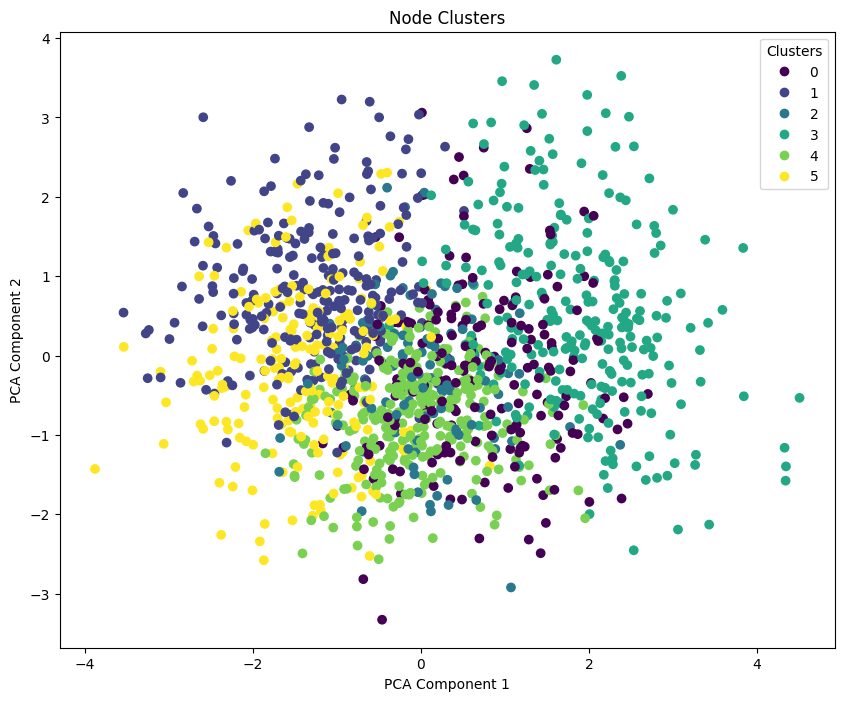

In [220]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis')

# Optional: Add a legend
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Node Clusters')
plt.show()

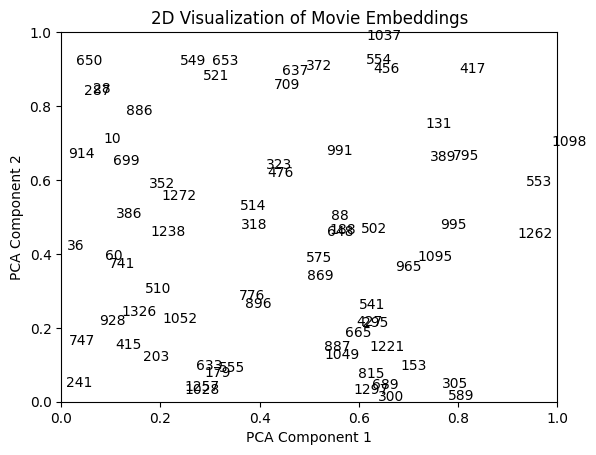

In [222]:
for i, movie in enumerate(movie_embeddings.keys()):
    plt.annotate(i, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Movie Embeddings')
plt.show()

In [251]:
dfe = pd.DataFrame({'Movie ID': embeddings_array, 'Cluster ID': clusters})

In [252]:
dfe

,Movie ID,Cluster ID
0,http://www.semanticweb.org/jalal/ontologies/20...,4
1,http://www.semanticweb.org/jalal/ontologies/20...,0
2,http://www.semanticweb.org/jalal/ontologies/20...,3
3,http://www.semanticweb.org/jalal/ontologies/20...,0
4,http://www.semanticweb.org/jalal/ontologies/20...,0
...,...,...
1349,http://www.semanticweb.org/jalal/ontologies/20...,2
1350,http://www.semanticweb.org/jalal/ontologies/20...,1
1351,http://www.semanticweb.org/jalal/ontologies/20...,0
1352,http://www.semanticweb.org/jalal/ontologies/20...,3


In [253]:
def extract_movie_id(uri):
    return uri.split('#')[-1]

# Create an empty list to store movie titles
movie_titles = []

# Iterate over each row in the DataFrame
for index, row in dfe.iterrows():
    movie_uri = row['Movie ID']
    movie_id = movie_uri
    
    # Assuming you have a triple pattern to query for movie titles (adjust based on your ontology)
    query = f"""
    SELECT ?title
    WHERE {{
        <{movie_uri}> <http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#title> ?title .
    }}
    """
    
    # Query the graph for the movie title
    results = gt.query(query)
    
    # Extract and store the movie title (assuming there is only one title per movie)
    for result in results:
        movie_title = result['title'].toPython()
        movie_titles.append({'Movie ID': movie_id, 'Movie Title': movie_title})

# Create a new DataFrame with movie titles
df_titles = pd.DataFrame(movie_titles)

# Display the DataFrame with movie titles
print(df_titles.head)

                                               Movie ID  \
0     http://www.semanticweb.org/jalal/ontologies/20...   
1     http://www.semanticweb.org/jalal/ontologies/20...   
2     http://www.semanticweb.org/jalal/ontologies/20...   
3     http://www.semanticweb.org/jalal/ontologies/20...   
4     http://www.semanticweb.org/jalal/ontologies/20...   
...                                                 ...   
1349  http://www.semanticweb.org/jalal/ontologies/20...   
1350  http://www.semanticweb.org/jalal/ontologies/20...   
1351  http://www.semanticweb.org/jalal/ontologies/20...   
1352  http://www.semanticweb.org/jalal/ontologies/20...   
1353  http://www.semanticweb.org/jalal/ontologies/20...   

                    Movie Title  
0                  Office Space  
1            As It Is in Heaven  
2                   Apur Sansar  
3                     Malcolm X  
4     The Man Who Fell to Earth  
...                         ...  
1349                Rear Window  
1350               

In [254]:
df_titles

,Movie ID,Movie Title
0,http://www.semanticweb.org/jalal/ontologies/20...,Office Space
1,http://www.semanticweb.org/jalal/ontologies/20...,As It Is in Heaven
2,http://www.semanticweb.org/jalal/ontologies/20...,Apur Sansar
3,http://www.semanticweb.org/jalal/ontologies/20...,Malcolm X
4,http://www.semanticweb.org/jalal/ontologies/20...,The Man Who Fell to Earth
...,...,...
1349,http://www.semanticweb.org/jalal/ontologies/20...,Rear Window
1350,http://www.semanticweb.org/jalal/ontologies/20...,Brazil
1351,http://www.semanticweb.org/jalal/ontologies/20...,Belle de Jour
1352,http://www.semanticweb.org/jalal/ontologies/20...,Ghostbusters


In [255]:
merged_df = pd.merge(dfe, df_titles, on='Movie ID', how='inner')

In [256]:
merged_df

,Movie ID,Cluster ID,Movie Title
0,http://www.semanticweb.org/jalal/ontologies/20...,4,Office Space
1,http://www.semanticweb.org/jalal/ontologies/20...,0,As It Is in Heaven
2,http://www.semanticweb.org/jalal/ontologies/20...,3,Apur Sansar
3,http://www.semanticweb.org/jalal/ontologies/20...,0,Malcolm X
4,http://www.semanticweb.org/jalal/ontologies/20...,0,The Man Who Fell to Earth
...,...,...,...
1349,http://www.semanticweb.org/jalal/ontologies/20...,2,Rear Window
1350,http://www.semanticweb.org/jalal/ontologies/20...,1,Brazil
1351,http://www.semanticweb.org/jalal/ontologies/20...,0,Belle de Jour
1352,http://www.semanticweb.org/jalal/ontologies/20...,3,Ghostbusters


In [307]:
sorted_df = merged_df.sort_values(by='Cluster ID')

# Display the sorted DataFrame
sorted_df.to_csv("out.csv", index=False)

In [287]:
dfs = pd.DataFrame(X_train,columns = ['subject','predicate','object'])
dfv = pd.DataFrame(X_valid,columns = ['subject','predicate','object'])
matchSubject = "http://www.semanticweb.org/jalal/ontologies/2023/10/movie-ontology#budget"
budget_df_train =dfs[dfs.predicate==matchSubject]
budget_df_val =dfv[dfv.predicate==matchSubject]

In [288]:
budget_df_train

,subject,predicate,object
287,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,12899867
348,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,6400000
369,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,2883848
454,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,0
609,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,0
...,...,...,...
134754,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,34000000
134833,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,70000000
135155,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,60000000
135214,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,180000000


In [290]:
budget_df_val

,subject,predicate,object
195,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,31000000
273,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,36000000
427,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,0
492,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,100000
517,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,25000000
...,...,...,...
33211,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,5500000
33313,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,40000000
33318,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,4000000
33618,http://www.semanticweb.org/jalal/ontologies/20...,http://www.semanticweb.org/jalal/ontologies/20...,5000000


In [ ]:
statements_filter = {'test': np.array(list({tuple(i) for i in np.vstack((budget_df_val, statements))}))}
statements_filter

In [302]:
# Prepare the validation triplets without the budget value
validation_triplets = budget_df_val[['subject', 'predicate','object']].values.tolist()
# Add a placeholder for the object
validation_triplets = [(subject, predicate, object) for subject, predicate,object in validation_triplets]


In [303]:
predictions = model.predict(validation_triplets)


In [304]:
predictions

array([ 4.0601764 ,  1.1238883 , 12.944666  ,  7.8117323 , 19.499327  ,
        3.3409064 , 14.686313  ,  5.250355  ,  8.245543  ,  7.2797956 ,
        2.4952593 ,  5.9487634 ,  2.2581685 ,  6.577239  ,  4.6679354 ,
        6.424439  ,  5.7131634 , 15.185833  ,  4.7736654 , 10.77527   ,
        6.1160984 ,  6.0336556 , 15.079583  ,  3.45546   ,  7.1510267 ,
        5.0466065 ,  8.864119  ,  4.975538  ,  6.271205  ,  9.289109  ,
        3.6230898 ,  6.7632055 ,  6.7937984 , 19.158731  ,  5.6788125 ,
        5.206519  ,  2.9173353 , 10.863496  , 16.48786   , 18.455122  ,
       10.81954   , 10.4641    ,  8.133771  , 12.900391  , 13.080646  ,
        5.6366425 ,  9.791602  , 19.31995   ,  4.8766675 , 17.175993  ,
        5.4454226 ,  3.2722492 , 13.257053  ,  1.217551  , 13.238123  ,
       15.272682  , 17.168388  ,  4.3605266 ,  4.2662563 , 10.925162  ,
        7.1298876 ,  5.3040056 ,  5.712574  ,  3.857632  , 10.5062    ,
       11.231892  ,  8.2008705 ,  0.6011585 ,  5.627629  ,  5.99